# A (rapid) Introduction to SunPy
## Stuart Mumford
### Aperio Software Ltd.

# https://github.com/aperiosoftware/stfc_summer_school_2024

![](./link.gif)

This session will give you a quick introduction to doing solar and heliospheric physics with Python, and a quick demo.

In a two hour slot, I am not going to be able to teach you Python, but hopefully I can show you that there are lots of tools to help you and give you enough information that you can find help once you leave here!

## Why Python?

# Employability

Sure there are loads of other reasons, but Python has loads of scientific and Solar / Helio specific functionality, and on top of that it has a welcoming and helpful community and because it's a programming language used all over the world for a load of different things, it's a great skill to have.

# The Community

Like many other scientific Python projects, SunPy's packages are **"Open Development"** this means anyone is encouraged to contribute in any way that they can, this might include:


* Telling the developers when something doesn't work, a feature is missing or hard to understand.
* Telling the developers what worked well for you, what you found easy to understand.
* Helping other people in the community by answering questions.
* Improving the documentation, adding examples.
* Fixing bugs and adding new features.

We *want you* to help us make scientific Python better!

# Modules, modules everywhere...

Python is a modular language, different people and groups develop _"packages"_ which are distrubuted and installable.

You pick the set of packages which help you solve your problems, and combine them together.

`sunpy`, `astropy`, `numpy` and `matplotlib` are all examples of packages which you can install and then import.

----

# Some setup

if you are on google colab you might need these two cells:

In [1]:
%pip install -r https://raw.githubusercontent.com/aperiosoftware/stfc_summer_school_2024/main/requirements.txt

In [2]:
from google.colab import output
output.enable_custom_widget_manager()

This sets up interactive plots in jupyterlab / notebook

In [1]:
%matplotlib widget

# An Example

Let's spend most of the rest of this session actually writing some code.

If you haven't used Python at all before some of this might be a little complex, but I will try and explain as we go along, we are going to play with a toy example of tracing a feature in the solar wind back to the Sun.
This is going to be *super* simplified, but the idea is to show off a few Python things in a couple of hours, not actually draw any scientific conclusions!

Let's start by downloading some in-situ data from [OMNIWeb](https://omniweb.gsfc.nasa.gov/html/ow_data.html) which is an aggregated data set of near-Earth observations.

For this we will use the [CDAWeb service](https://cdaweb.gsfc.nasa.gov/index.html) with sunpy's Fido and then load them into a [sunpy `Timeseries` object](https://docs.sunpy.org/en/stable/guide/data_types/timeseries.html).

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sunpy.net import Fido, attrs as a
from sunpy.timeseries import TimeSeries

In [4]:
results = Fido.search(a.Time("2024-05-01", "2024-05-30"), a.cdaweb.Dataset.omni_hro2_1min)
results

<sunpy.net.fido_factory.UnifiedResponse object at 0x7f6136416720>
Results from 1 Provider:

1 Results from the CDAWEBClient:
Source: https://cdaweb.gsfc.nasa.gov/index.html

   Dataset            Start time               End time       
-------------- ----------------------- -----------------------
OMNI_HRO2_1MIN 2024-05-01 00:00:00.000 2024-05-31 23:59:00.000

In [5]:
omni_file = Fido.fetch(results)
omni_file

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['/home/stuart/sunpy_data/data/omni_hro2_1min_20240501_v01.cdf']

In [6]:
omni_data = TimeSeries(omni_file)

2024-09-04 13:05:47 - sunpy - WARNING: SunpyUserWarning: No units provided for variable "Beta". Assigning dimensionless units.
2024-09-04 13:05:47 - sunpy - WARNING: SunpyUserWarning: No units provided for variable "Day". Assigning dimensionless units.
2024-09-04 13:05:47 - sunpy - WARNING: SunpyUserWarning: No units provided for variable "HR". Assigning dimensionless units.
2024-09-04 13:05:47 - sunpy - WARNING: SunpyUserWarning: No units provided for variable "IMF". Assigning dimensionless units.
2024-09-04 13:05:47 - sunpy - WARNING: SunpyUserWarning: No units provided for variable "IMF_PTS". Assigning dimensionless units.
2024-09-04 13:05:47 - sunpy - WARNING: SunpyUserWarning: No units provided for variable "Mach_num". Assigning dimensionless units.
2024-09-04 13:05:47 - sunpy - WARNING: SunpyUserWarning: No units provided for variable "Mgs_mach_num". Assigning dimensionless units.
2024-09-04 13:05:47 - sunpy - WARNING: SunpyUserWarning: No units provided for variable "Minute". As

In [7]:
omni_data.meta

|-------------------------------------------------------------------------------------------------|
|TimeRange                  | Columns         | Meta                                              |
|-------------------------------------------------------------------------------------------------|
|2024-05-01T00:00:00.000000 | AE_INDEX        | Project: ['NSSDC']                                |
|            to             | AL_INDEX        | Discipline: ['Space Physics>Interplanetary Studies|
|2024-05-31T23:59:00.000000 | ASY_D           | Source_name: ['OMNI (1AU IP Data)>Merged 1 minute |
|                           | ASY_H           | Data_type: ['HRO2>Definitive 1minute (modified)'] |
|                           | AU_INDEX        | Descriptor: ['IMF and Plasma data']               |
|                           | BSN_x           | Data_version: ['1']                               |
|                           | BSN_y           | TITLE: ['Near-Earth Heliosphere Data (OMNI)']     |


In [8]:
for col in omni_data.columns:
    print(col)

AE_INDEX
AL_INDEX
ASY_D
ASY_H
AU_INDEX
BSN_x
BSN_y
BSN_z
BX_GSE
BY_GSE
BY_GSM
BZ_GSE
BZ_GSM
Beta
Day
E
F
HR
IMF
IMF_PTS
Mach_num
Mgs_mach_num
Minute
NaNp_Ratio
PLS
PLS_PTS
Pressure
RMS_SD_B
RMS_SD_fld_vec
RMS_Timeshift
RMS_phase
SYM_D
SYM_H
T
Time_btwn_obs
Timeshift
Vx
Vy
Vz
YR
flow_speed
percent_interp
proton_density
x
y
z


In [9]:
omni_data.units

{'AE_INDEX': Unit("nT"),
 'AL_INDEX': Unit("nT"),
 'ASY_D': Unit("nT"),
 'ASY_H': Unit("nT"),
 'AU_INDEX': Unit("nT"),
 'BSN_x': Unit("earthRad"),
 'BSN_y': Unit("earthRad"),
 'BSN_z': Unit("earthRad"),
 'BX_GSE': Unit("nT"),
 'BY_GSE': Unit("nT"),
 'BY_GSM': Unit("nT"),
 'BZ_GSE': Unit("nT"),
 'BZ_GSM': Unit("nT"),
 'Beta': Unit(dimensionless),
 'Day': Unit(dimensionless),
 'E': Unit("mV / m"),
 'F': Unit("nT"),
 'HR': Unit(dimensionless),
 'IMF': Unit(dimensionless),
 'IMF_PTS': Unit(dimensionless),
 'Mach_num': Unit(dimensionless),
 'Mgs_mach_num': Unit(dimensionless),
 'Minute': Unit(dimensionless),
 'NaNp_Ratio': Unit(dimensionless),
 'PLS': Unit(dimensionless),
 'PLS_PTS': Unit(dimensionless),
 'Pressure': Unit("nPa"),
 'RMS_SD_B': Unit("nT"),
 'RMS_SD_fld_vec': Unit("nT"),
 'RMS_Timeshift': Unit("s"),
 'RMS_phase': Unit("nT"),
 'SYM_D': Unit("nT"),
 'SYM_H': Unit("nT"),
 'T': Unit("K"),
 'Time_btwn_obs': Unit("s"),
 'Timeshift': Unit("s"),
 'Vx': Unit("km / s"),
 'Vy': Unit("km 

Plotting in-situ data
---
Matplotlib can be used to plot the downloaded data. In this example we plot the solar wind speed and the z component of the magnetic field, to see different polarity solar wind streams.

In [10]:
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f6134f021e0>

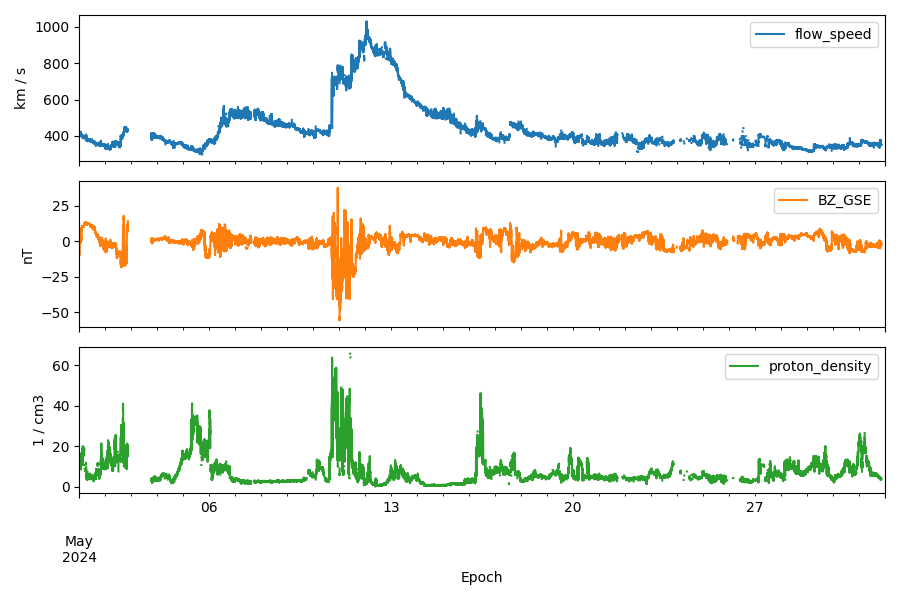

In [11]:
fig, axes = plt.subplots(nrows=3, figsize=(9, 6), sharex=True)

omni_data.plot(axes=axes[0], columns=["flow_speed"], color="C0")

omni_data.plot(axes=axes[1], columns=["BZ_GSE"], color="C1")

omni_data.plot(axes=axes[2], columns=["proton_density"], color="C2")

fig.tight_layout()

## Finding Maxima (the easy way)

To give us a single time to track back the flow to the Sun, let's find the point in this months worth of data which had the highest flow speed.

If you were doing this properly then you would want to smooth the data, which you could do in many better ways such as the [Savitzky-Golay filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html) in `scipy`. For expedience we are just going to use the maximum.

In [12]:
import numpy as np

In [13]:
# Extract a unit-aware array
proton_density = omni_data.to_dataframe()["proton_density"]

In [14]:
np.max(proton_density)

np.float32(65.86)

In [15]:
n_proton_max = np.nanmax(proton_density)
n_proton_max

np.float32(65.86)

In [16]:
np.nanargmax(proton_density)

np.int64(15002)

In [17]:
n_proton_max_index = np.nanargmax(proton_density)
n_proton_max_index

np.int64(15002)

In [18]:
n_proton_max_time = omni_data.to_dataframe().index[n_proton_max_index]
n_proton_max_time

Timestamp('2024-05-11 10:02:00')

Improving figure formatting
---

We can improve this plot a little with some better formatting, and add a vertical line for our maximum flow speed.

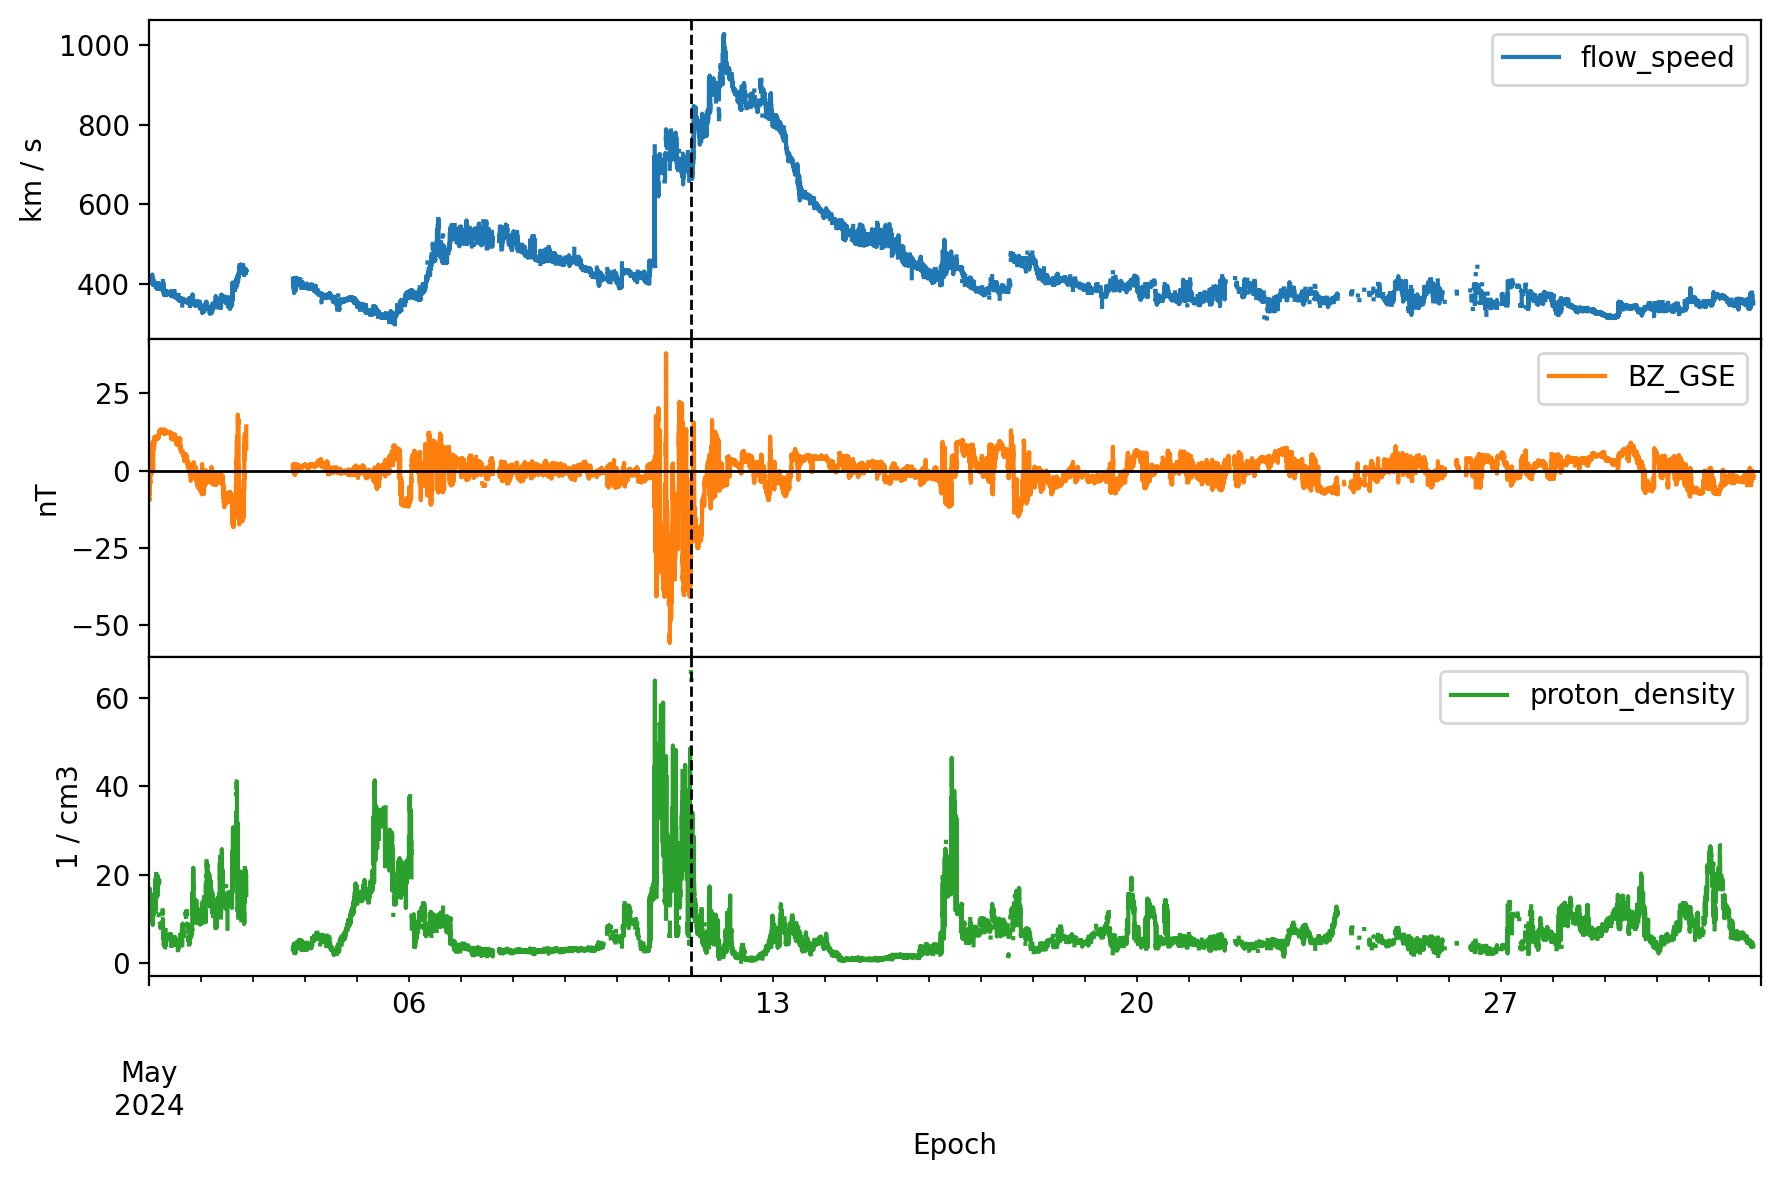

In [19]:
fig.subplots_adjust(hspace=0)

for ax in axes:
    ax.axvline(n_proton_max_time, color='black', linewidth=1, linestyle='--')

# Add a zero line to the Bz plot
axes[1].axhline(0, color='black', linewidth=1)

fig

# Timing the flow back to the Sun

Let's figure out, in a very inaccurate manner, rougly when this solar wind stream would have left the Sun.

To calculate this propagation delay we can use the ``astropy.units`` module. This provides an extension of normal numbers and arrays, and allows units to be attached. All the unit mathematics is calculated automatically, avoiding the need to keep track of specific units.

In [20]:
import astropy.units as u
import astropy.constants as const

from sunpy.time import parse_time
from sunpy.coordinates.ephemeris import get_earth

Let's assume the solar wind is relesed from the surface of the Sun, so the propagation distance is $D_{sun} - R_{sun}$

In [21]:
earth_coord = get_earth(n_proton_max_time)
earth_coord

<SkyCoord (HeliographicStonyhurst: obstime=2024-05-11T10:02:00.000000000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (0., -3.04337334, 1.01008254)>

In [22]:
d = earth_coord.radius - const.R_sun
d

<Distance 1.00543208 AU>

Let's assume that this stream would have been travelling at the speed it arrived at Earth the whole time:

In [23]:
vel_at_max = omni_data.quantity('flow_speed')[n_proton_max_index]
vel_at_max

<Quantity 710.2 km / s>

In [24]:
vel_at_max.to(u.imperial.mile/u.hour)

<Quantity 1588672.1 mi / h>

Calculate the propagation time, and convert it to units of days

In [25]:
t = (d / vel_at_max).to(u.day)
t

<Quantity 2.45122812 d>

In [26]:
estimated_departure = parse_time(n_proton_max_time) - t
estimated_departure.iso

'2024-05-08 23:12:13.890'

# Downloading Data with sunpy's Fido

Now we have a rough idea of the time that the wind stream would have left the Sun, let's see what was happening in EUV around that time.

In [27]:
start_time = estimated_departure - 0.5 * u.day
end_time = estimated_departure + 0.5 * u.day

In [28]:
result = Fido.search(a.Time(start_time, end_time),
                     a.Sample(1 * u.hour),
                     a.Instrument.aia,
                     a.Wavelength(19.3 * u.nm))
result

<sunpy.net.fido_factory.UnifiedResponse object at 0x7f612f548aa0>
Results from 1 Provider:

24 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 1.627 Gbyte

       Start Time               End Time        Source ... Extent Type   Size  
                                                       ...              Mibyte 
----------------------- ----------------------- ------ ... ----------- --------
2024-05-08 11:12:16.000 2024-05-08 11:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-08 12:12:16.000 2024-05-08 12:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-08 13:12:16.000 2024-05-08 13:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-08 14:12:16.000 2024-05-08 14:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-08 15:12:16.000 2024-05-08 15:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-08 16:12:16.000 2024-05-08 16:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-08 17:12:23.000 2024-05-08 17:12:24.000    SDO ...    FULLDISK 64.64844
2024-05-08 18:12:23.000 2024-05-08 18:12:24.000    SDO ...    FULLDISK 64.64844
2024-05-08 19:12:23.000 2024-05-08 19:12:24.000    SDO ...    FULLDISK 64.64844
                    ...                     ...    ... ...         ...      ...
2024-05-09 01:12:16.000 2024-05-09 01:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-09 02:12:16.000 2024-05-09 02:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-09 03:12:16.000 2024-05-09 03:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-09 04:12:16.000 2024-05-09 04:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-09 05:12:16.000 2024-05-09 05:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-09 06:12:16.000 2024-05-09 06:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-09 07:12:16.000 2024-05-09 07:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-09 08:12:16.000 2024-05-09 08:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-09 09:12:16.000 2024-05-09 09:12:17.000    SDO ...    FULLDISK 64.64844
2024-05-09 10:12:16.000 2024-05-09 10:12:17.000    SDO ...    FULLDISK 64.64844
Length = 24 rows

In [29]:
files = Fido.fetch(result)

Files Downloaded:   0%|          | 0/24 [00:00<?, ?file/s]

In [30]:
files

['/home/stuart/sunpy_data/data/aia.lev1.193A_2024_05_08T11_12_16.84Z.image_lev1.fits', '/home/stuart/sunpy_data/data/aia.lev1.193A_2024_05_08T12_12_16.84Z.image_lev1.fits', '/home/stuart/sunpy_data/data/aia.lev1.193A_2024_05_08T13_12_16.84Z.image_lev1.fits', '/home/stuart/sunpy_data/data/aia.lev1.193A_2024_05_08T14_12_16.84Z.image_lev1.fits', '/home/stuart/sunpy_data/data/aia.lev1.193A_2024_05_08T15_12_16.84Z.image_lev1.fits', '/home/stuart/sunpy_data/data/aia.lev1.193A_2024_05_08T16_12_16.84Z.image_lev1.fits', '/home/stuart/sunpy_data/data/aia.lev1.193A_2024_05_08T17_12_23.47Z.image_lev1.fits', '/home/stuart/sunpy_data/data/aia.lev1.193A_2024_05_08T18_12_23.47Z.image_lev1.fits', '/home/stuart/sunpy_data/data/aia.lev1.193A_2024_05_08T19_12_23.47Z.image_lev1.fits', '/home/stuart/sunpy_data/data/aia.lev1.193A_2024_05_08T20_12_23.47Z.image_lev1.fits', '/home/stuart/sunpy_data/data/aia.lev1.193A_2024_05_08T21_12_23.47Z.image_lev1.fits', '/home/stuart/sunpy_data/data/aia.lev1.193A_2024_05_0

## sunpy Map

Having downloaded some AIA data, let us load it with `sunpy`.

`sunpy` provides a [`Map` datatype](https://docs.sunpy.org/en/stable/guide/data_types/maps.html) which provides a coordinate aware wrapper to 2D imaging data, and sequences of such images.

To start with we will load all the images we just downloaded into a single [`MapSequence`](https://docs.sunpy.org/en/stable/api/sunpy.map.MapSequence.html) object.

In [31]:
import sunpy.map

In [32]:
map_seq = sunpy.map.Map(files, sequence=True)

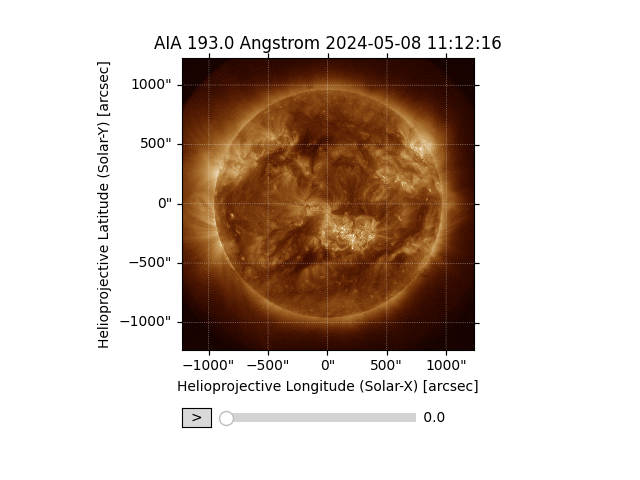

In [33]:
map_seq.peek()

You will notice that as well as a large (X-class) flare, SDO performs a roll manoeuvre so the whole Sun rotates. SunPy is able to perform all the analysis of this dataset without having to worry about this, as it will automatically be taken into account.

# Picking out a single image

To show off `Map` a little more, let us pick out the map which is closest in time to our estimated departure time. To do this we subtract the map's time from the estimated time and find the minima of the absolute difference.

In [36]:
map_time_shift = [estimated_departure - m.date for m in map_seq]

In [37]:
map_time_shift

[<TimeDelta object: scale='tai' format='jd' value=0.4999658610629704>,
 <TimeDelta object: scale='tai' format='jd' value=0.45829919439630373>,
 <TimeDelta object: scale='tai' format='jd' value=0.416632527729637>,
 <TimeDelta object: scale='tai' format='jd' value=0.37496586106297036>,
 <TimeDelta object: scale='tai' format='jd' value=0.33329919439630373>,
 <TimeDelta object: scale='tai' format='jd' value=0.291632527729637>,
 <TimeDelta object: scale='tai' format='jd' value=0.24988912495185922>,
 <TimeDelta object: scale='tai' format='jd' value=0.20822245828519248>,
 <TimeDelta object: scale='tai' format='jd' value=0.16655579161852585>,
 <TimeDelta object: scale='tai' format='jd' value=0.12488912495185922>,
 <TimeDelta object: scale='tai' format='jd' value=0.08322245828519248>,
 <TimeDelta object: scale='tai' format='jd' value=0.04155579161852585>,
 <TimeDelta object: scale='tai' format='jd' value=-0.00011087504814077942>,
 <TimeDelta object: scale='tai' format='jd' value=-0.041700805603

In [38]:
nearest_map_index = np.argmin(np.abs(map_time_shift))
nearest_map_index

np.int64(12)

## Map, Coordinates and Metadata

Map stores coordinate information and metadata in ways which allow uniform access to metadata irrespective of the source of the image.

<sunpy.map.sources.sdo.AIAMap object at 0x7fca2cb1ffb0>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 2
Detector:		 AIA
Measurement:		 193.0 Angstrom
Wavelength:		 193.0 Angstrom
Observation Date:	 2024-05-08 23:12:23
Exposure Time:		 2.999412 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.600714 0.600714] arcsec / pix
Reference Pixel:	 [2040.10437  2044.045044] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[-1.,  2.,  1., ...,  0.,  1., -2.],
       [ 1., -1.,  0., ..., -1.,  0.,  0.],
       [-2., -1., -1., ...,  0.,  0.,  0.],
       ...,
       [-2.,  2.,  0., ..., -1., -2., -2.],
       [ 0., -1., -2., ..., -2., -1.,  0.],
       [ 0.,  0., -2., ...,  0., -1.,  2.]], dtype=float32)
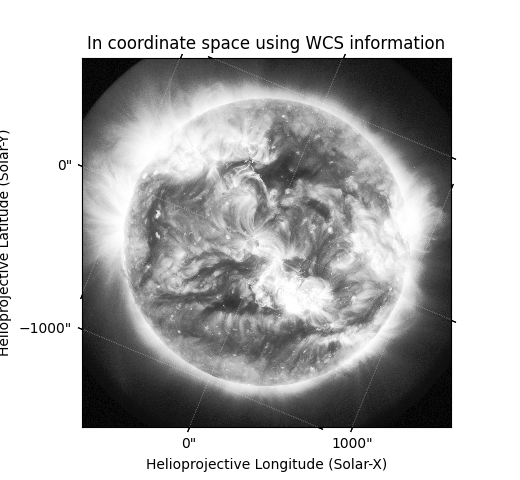
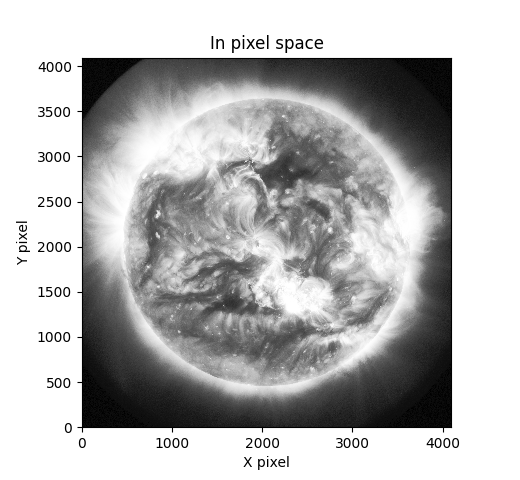
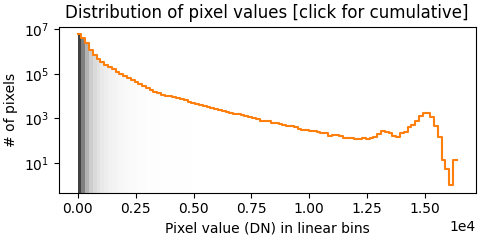
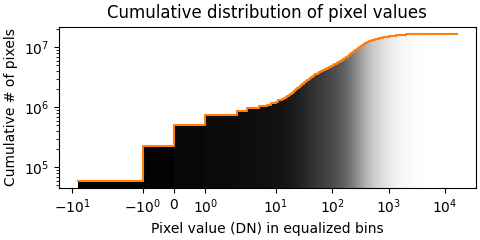

In [39]:
nearest_map = map_seq[nearest_map_index]
nearest_map

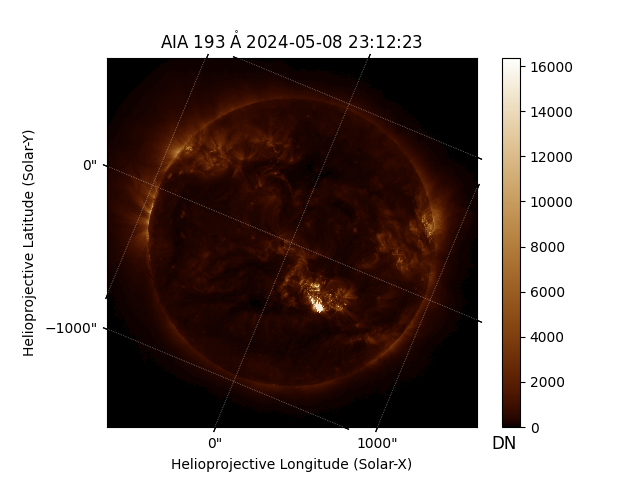

In [40]:
nearest_map.peek(norm=plt.Normalize())

In [41]:
nearest_map.date

<Time object: scale='utc' format='isot' value=2024-05-08T23:12:23.470>

In [42]:
nearest_map.wavelength

<Quantity 193. Angstrom>

In [43]:
nearest_map.coordinate_frame

<Helioprojective Frame (obstime=2024-05-08T23:12:24.970, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2024-05-08T23:12:24.970, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.01337529, -3.31770973, 1.51004014e+11)>)>

In [44]:
nearest_map.observer_coordinate

<SkyCoord (HeliographicStonyhurst: obstime=2024-05-08T23:12:24.970, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.01337529, -3.31770973, 1.51004014e+11)>

In [45]:
nearest_map.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 
CRVAL : np.float64(0.0) np.float64(0.0) 
CRPIX : np.float64(2041.10437) np.float64(2045.045044) 
PC1_1 PC1_2  : np.float64(0.92349439054249) np.float64(-0.38361192713022) 
PC2_1 PC2_2  : np.float64(0.38361192713022) np.float64(0.92349439054249) 
CDELT : np.float64(0.000166865) np.float64(0.000166865) 
NAXIS : 4096  4096

## Coordinates

Astropy Coordinates, extended by `sunpy`, provide a fantastic framework for representing and transforming real world coordinates.

In [46]:
from astropy.coordinates import SkyCoord

In [47]:
point_of_interest = SkyCoord(-275, 0, unit=u.arcsec, frame=nearest_map.coordinate_frame)
point_of_interest

<SkyCoord (Helioprojective: obstime=2024-05-08T23:12:24.970, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2024-05-08T23:12:24.970, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.01337529, -3.31770973, 1.51004014e+11)>): (Tx, Ty) in arcsec
    (-275., 0.)>

In [48]:
poi_hgs = SkyCoord(30, -5, unit=u.deg, frame='heliographic_stonyhurst', obstime=nearest_map.date)
poi_hgs

<SkyCoord (HeliographicStonyhurst: obstime=2024-05-08T23:12:23.470, rsun=695700.0 km): (lon, lat) in deg
    (30., -5.)>

In [49]:
poi_hgs.transform_to(nearest_map.coordinate_frame)

<SkyCoord (Helioprojective: obstime=2024-05-08T23:12:24.970, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2024-05-08T23:12:24.970, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.01337529, -3.31770973, 1.51004014e+11)>): (Tx, Ty, distance) in (arcsec, arcsec, km)
    (475.42723096, -35.38564683, 1.50401792e+08)>

## Bonus: Finding the flare

In this example we shall locate the brightest region on the disk and calculate the coordinates for it. We shall then use this to cutout a region around our flare.

Firstly, to prevent us from finding a single anomalously bright pixel, we will bin the map in to 10x10 pixel "superpixels" and find the maxima of that image.

In [50]:
superpixel_map = nearest_map.superpixel(dimensions=(10, 10)*u.pixel)

In [51]:
flare_array_indicies = np.argwhere(superpixel_map.data == superpixel_map.data.max())[0]

In [52]:
flare_array_indicies

array([130, 235])

Now we convert this array index to the world coordinates of the map:

In [53]:
flare_world_coordinates = superpixel_map.wcs.array_index_to_world(flare_array_indicies[0], flare_array_indicies[1])
flare_world_coordinates

<SkyCoord (Helioprojective: obstime=2024-05-08T23:12:24.970, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2024-05-08T23:12:24.970, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.01337529, -3.31770973, 1.51004014e+11)>): (Tx, Ty) in arcsec
    (344.83408409, -337.81662246)>

Now let's calculate the bottom left coordinate of a box centred on this point.

In [54]:
from astropy.coordinates import SkyCoord

In [55]:
roi_width = 400*u.arcsec
roi_height = 400*u.arcsec
flare_bottom_left = SkyCoord(
    flare_world_coordinates.Tx - roi_width/2,
    flare_world_coordinates.Ty - roi_height/2,
    frame=flare_world_coordinates
)

In [56]:
flare_bottom_left

<SkyCoord (Helioprojective: obstime=2024-05-08T23:12:24.970, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2024-05-08T23:12:24.970, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.01337529, -3.31770973, 1.51004014e+11)>): (Tx, Ty) in arcsec
    (144.83408409, -537.81662246)>

Now we can use sunpy's plotting functions to draw the coordinate point of interest as well as the box.

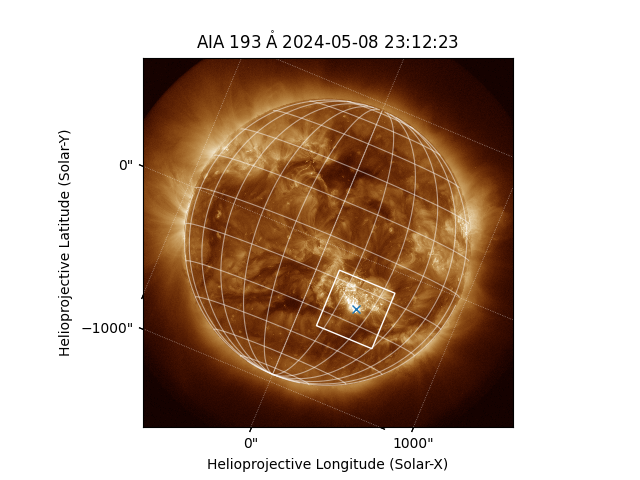

In [57]:
plt.figure()
ax = plt.subplot(projection=nearest_map)

nearest_map.plot()
nearest_map.draw_grid()

ax.plot_coord(flare_world_coordinates, marker='x')

nearest_map.draw_quadrangle(bottom_left=flare_bottom_left, width=roi_width, height=roi_height)

Finally, we can crop or "submap" the map to the same box we drew above.

<sunpy.map.sources.sdo.AIAMap object at 0x7fca284bb3b0>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 2
Detector:		 AIA
Measurement:		 193.0 Angstrom
Wavelength:		 193.0 Angstrom
Observation Date:	 2024-05-08 23:12:23
Exposure Time:		 2.999412 s
Dimension:		 [872. 872.] pix
Coordinate System:	 helioprojective
Scale:			 [0.600714 0.600714] arcsec / pix
Reference Pixel:	 [ 121.10437  1175.045044] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[124., 135., 155., ..., 146., 138., 137.],
       [127., 126., 135., ..., 137., 149., 155.],
       [131., 134., 139., ..., 134., 143., 153.],
       ...,
       [261., 252., 290., ..., 467., 453., 449.],
       [277., 275., 269., ..., 467., 485., 472.],
       [272., 277., 261., ..., 445., 474., 473.]], dtype=float32)
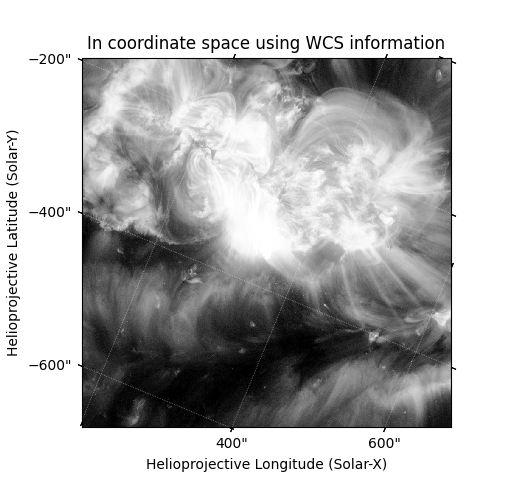
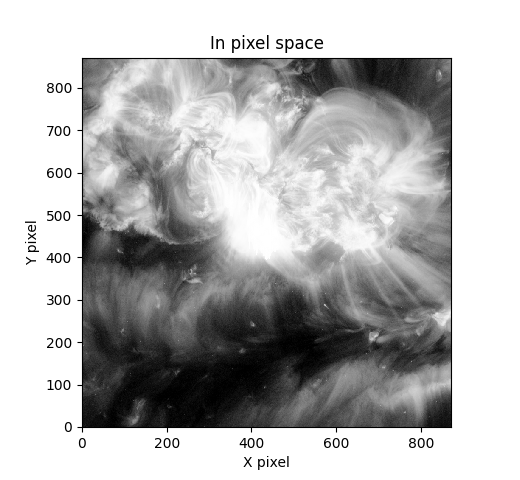
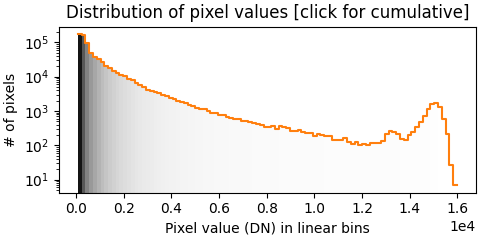
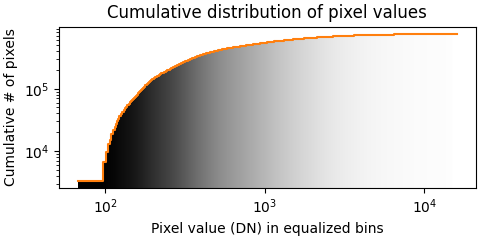

In [58]:
small_map = nearest_map.submap(bottom_left=flare_bottom_left, width=roi_width, height=roi_height)
small_map

## Bonus: Animating the flare

In this example we are going to track the region shown in our small map above to create an animation of the flare.

In [59]:
from sunpy.coordinates import propagate_with_solar_surface

We want the output of our animation to have the north-south line aligned with the image, so we will apply the rotate method to remove the rotation between the pixel grid and solar north first.

<sunpy.map.sources.sdo.AIAMap object at 0x7fca2c8e0980>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 2
Detector:		 AIA
Measurement:		 193.0 Angstrom
Wavelength:		 193.0 Angstrom
Observation Date:	 2024-05-08 23:12:23
Exposure Time:		 2.999412 s
Dimension:		 [1140. 1140.] pix
Coordinate System:	 helioprojective
Scale:			 [0.600714 0.600714] arcsec / pix
Reference Pixel:	 [  -4.54090024 1131.85978618] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
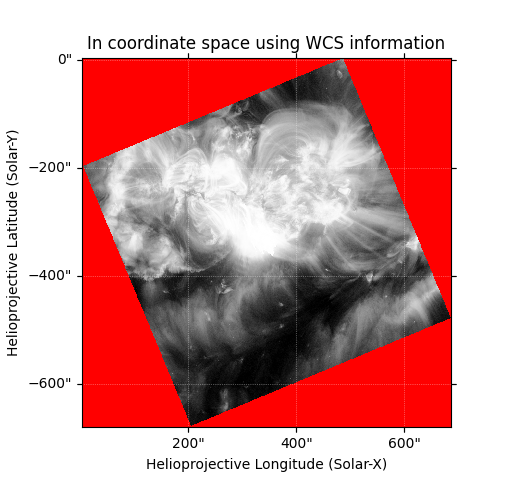
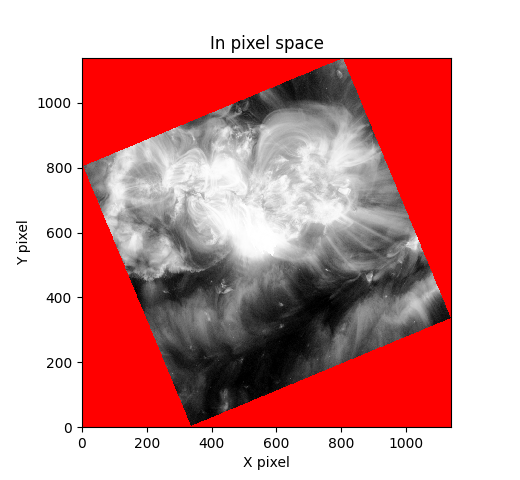
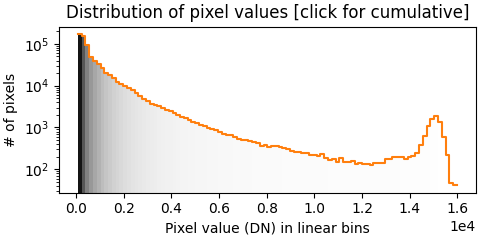
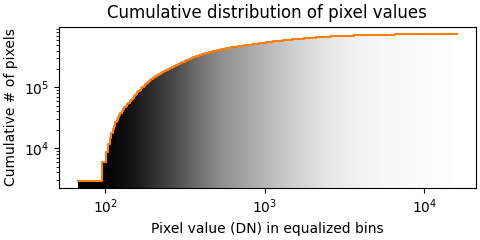

In [60]:
small_map_rot = small_map.rotate()
small_map_rot

In this next step, we "reproject" each element of the original sequence (the full disk maps including changing rotation) to the de-rotated field of view of the cutout above.

In addition to this we use the [`propagate_with_solar_surface`](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.propagate_with_solar_surface.html) context manager to temporarily adjust how sunpy does its coordinate transforms to also account for the differential rotation of the solar surface. This means the output image will track the active region as it rotates across the disk.

In [61]:
with propagate_with_solar_surface():
    new_maps = [m.reproject_to(small_map_rot.wcs) for m in map_seq]

2024-09-04 13:02:59 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2024-09-04 13:03:01 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2024-09-04 13:03:02 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2024-09-04 13:03:04 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2024-09-04 13:03:05 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2024-09-04 13:03:07 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2024-09-04 13:03:08 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2024-09-04 13:03:10 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2024-09-04 13:03:11 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2024-09-04 13:03:13 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2024-09-04 13:03:14 - reproject.common - INFO: Calling _reproject_full in non-dask mode
2024-09-04 13:03:16 - reproject.

In [62]:
aia_sequence_aligned = sunpy.map.Map(new_maps, sequence=True)

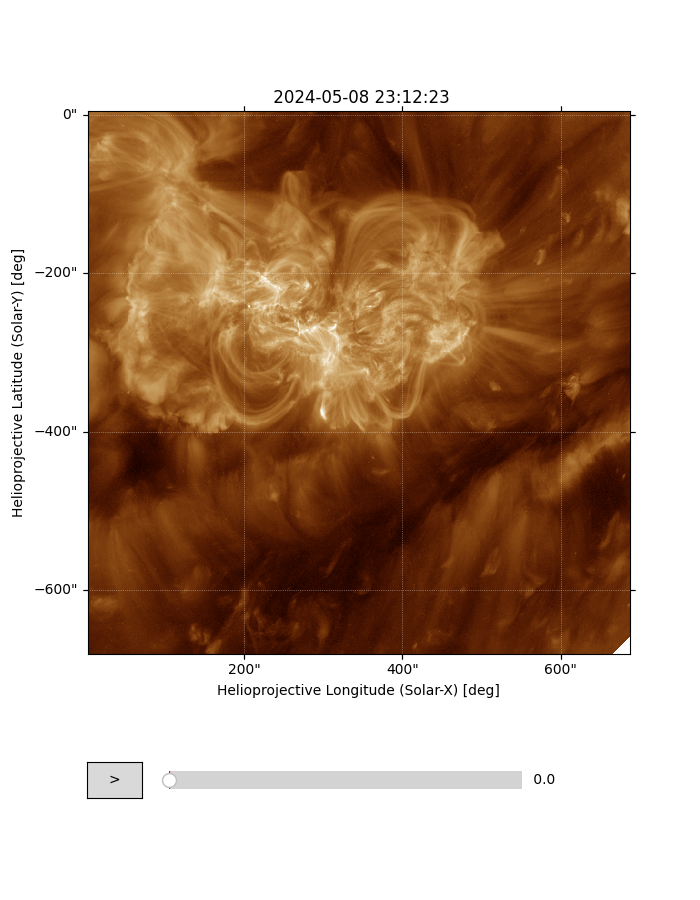

In [63]:
fig = plt.figure(figsize=(7, 9))
aia_sequence_aligned.peek(fig=fig)

# Where Next

This was a very rapid introduction, some places you can go for more information, inspiration or help are:

* [SunPy Website](https://sunpy.org) - Lots of links to various SunPy packages.
* [`sunpy` Gallery](https://docs.sunpy.org/en/latest/generated/gallery/index.html) - Lots of examples.
* [SunPy's Chat](https://app.element.io/#/room/#sunpy:openastronomy.org) - Great place to get help with Python in general and come say Hi.
* [OpenAstronomy Forum](https://community.openastronomy.org) - Forum shared with various Astro / Solar projects, a great place to share cool things you wrote or ask questions.
* Contact me - [on Matrix](https://matrix.to/#/@cadair:cadair.com) - [by Email](stuart@cadair.com)